In [112]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%config IPCompleter.greedy=True

In [113]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [114]:
np.random.seed(0)

In [115]:
df=pd.read_csv('train_iris.csv')
df2=pd.read_csv('test_iris.csv')
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [116]:
X=df.drop(['Unnamed: 0','species'],axis=1)
X2=df2.drop(['Unnamed: 0','species'],axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


In [117]:
Y=df.species
Y2=df2.species
Y.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

In [118]:
X.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [119]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [120]:
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 100\nvalue = [35, 30, 35]'),
 Text(66.96000000000001, 152.208, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[3] <= 1.75\nentropy = 0.996\nsamples = 65\nvalue = [0, 30, 35]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 4.95\nentropy = 0.439\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(66.96000000000001, 65.232, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(200.88000000000002, 65.232, 'X[0] <= 6.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

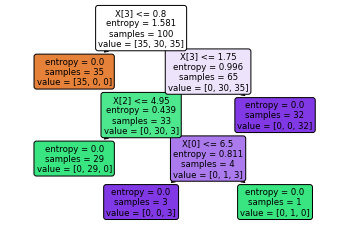

In [121]:
tree.plot_tree(clf, rounded=True, filled=True)

In [122]:
clf.score(X,Y)

1.0

In [123]:
clf.score(X2,Y2)

0.92

In [124]:
max_depth_value=range(1,100)
scores_data = pd.DataFrame()

In [125]:
for max_depth in max_depth_value:
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X,Y)
    train_score=clf.score(X,Y)
    test_score=clf.score(X2,Y2)
    train_df=pd.DataFrame({'max_depth':[max_depth],
                          'train_score':[train_score],
                          'test_score':[test_score] })
    score_data=score_data.append(train_df)


In [126]:
score_data.head()

,max_depth,train_score,test_score
0,99,1.0,1.0
0,99,1.0,1.0
0,1,0.7,0.6
0,2,1.0,1.0
0,3,1.0,1.0


In [127]:
score_data_long=score_data.melt( id_vars='max_depth', value_vars=['train_score','test_score'], var_name='set_type', value_name='score', col_level=None) 

In [128]:
score_data_long.head()

,max_depth,set_type,score
0,99,train_score,1.0
1,99,train_score,1.0
2,1,train_score,0.7
3,2,train_score,1.0
4,3,train_score,1.0


In [129]:
import seaborn

In [130]:
seaborn.__version__

'0.9.0'

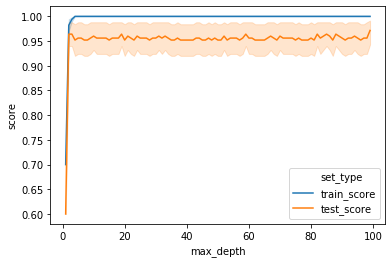

In [131]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=score_data_long)